<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project6/Project6_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


%matplotlib inline

In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/ahshawaf/AML/project6/bridge.txt',header=None,delim_whitespace=True)

In [323]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6,8,6,9,0,0,0,0,0,0,0,0,0,0,0,0
1,7,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0
2,8,8,8,18,31,12,22,34,74,74,68,60,96,99,104,79
3,9,9,16,34,11,15,38,54,60,22,65,75,99,78,92,114
4,9,19,34,39,23,26,31,39,16,31,34,41,59,63,33,38


In [324]:
len(df)

4096

In [325]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [0]:
dfnp=np.array(df)

In [327]:
dfnp

array([[  6,   8,   6, ...,   0,   0,   0],
       [  7,   4,   3, ...,   0,   0,   0],
       [  8,   8,   8, ...,  99, 104,  79],
       ...,
       [251, 247, 243, ..., 127, 141, 153],
       [252, 250, 249, ...,  92,  94,  99],
       [253, 224, 209, ..., 246, 233, 227]])

In [0]:
dfnp4x4=dfnp.reshape(4096,4,4)

In [329]:
dfnp4x4

array([[[  6,   8,   6,   9],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  7,   4,   3,   4],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  8,   8,   8,  18],
        [ 31,  12,  22,  34],
        [ 74,  74,  68,  60],
        [ 96,  99, 104,  79]],

       ...,

       [[251, 247, 243, 235],
        [250, 248, 247, 247],
        [252, 252, 254, 251],
        [104, 127, 141, 153]],

       [[252, 250, 249, 251],
        [254, 254, 254, 251],
        [230, 234, 241, 252],
        [ 93,  92,  94,  99]],

       [[253, 224, 209, 224],
        [255, 250, 246, 233],
        [249, 253, 252, 254],
        [232, 246, 233, 227]]])

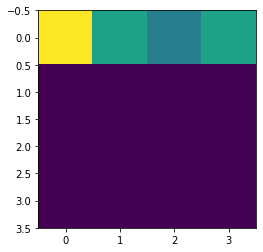

In [330]:
plt.imshow(dfnp4x4[1])

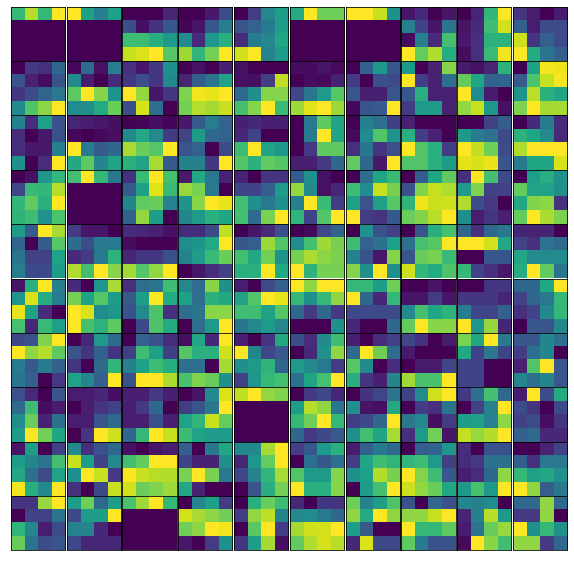

In [331]:
nrow=10
ncol = 10
plt.figure(figsize=(nrow,ncol))
grd=gridspec.GridSpec(nrow,ncol)
grd.update(wspace=0.00, hspace=0.0)
for i in range(ncol*nrow):
  plt.subplot(grd[i])
  plt.imshow(dfnp4x4[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
plt.show()

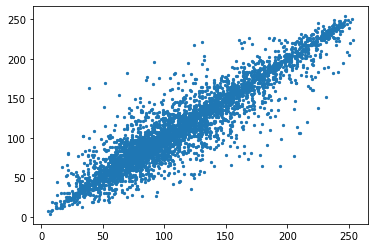

In [332]:
plt.scatter(dfnp[:,0],dfnp[:,1],s=5) 

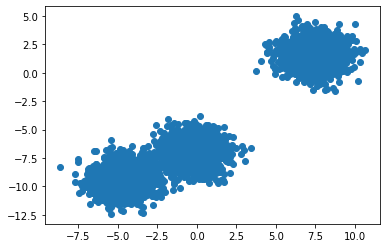

In [358]:
plt.scatter(x[:,0],x[:,1])

In [0]:
x,y=make_blobs(n_samples=df.shape[0])

In [0]:
kmeans=[KMeans(n_clusters=k, random_state=57).fit(df) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans]

Text(0.5, 1.0, 'K - Elbow')

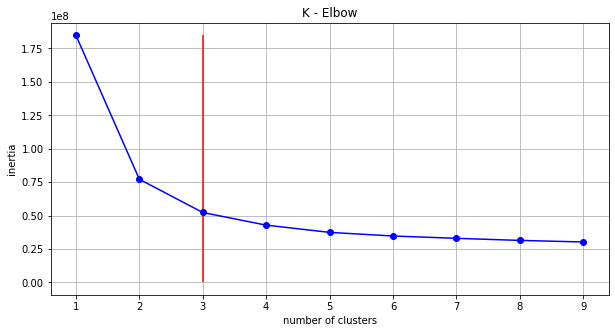

In [334]:
ax=plt.figure(figsize=(10,5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.vlines(3,0,np.max(inertias),color='red')
plt.title("K - Elbow")

In [359]:
km_model=KMeans(n_clusters=3,random_state=57)
km_model.fit_transform(x)

array([[12.46832211,  1.5875684 ,  4.81976107],
       [ 1.61941959,  9.71507034, 14.65803606],
       [16.37184543,  5.50849774,  0.80316671],
       ...,
       [11.29919897,  0.12085787,  5.16975406],
       [15.80245525,  4.80411647,  0.5417481 ],
       [16.30953975,  5.12280701,  0.41268689]])

In [0]:
km_pred = km_model.predict(x)

In [367]:
km_pred

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

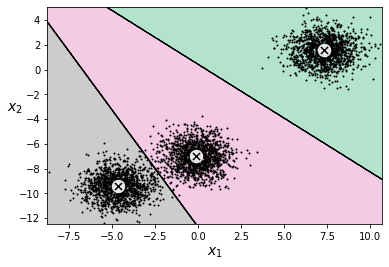

In [365]:
plot_decision_boundaries(km_model,x)

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#Refrences

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html